# geoML package example

In this example we will see how to train a Gaussian Process model on the Walker Lake data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import geoml

## Importing and preparing data

In [2]:
walker, walker_ex = geoml.data.Examples.walker()
print(walker)
print("\n\n")
print(walker_ex)

Object of class Points2D with 470 data locations

Data preview:

   ID      V      U  T
0   1    0.0 -999.0  2
1   2    0.0 -999.0  2
2   3  224.4 -999.0  2
3   4  434.4 -999.0  2
4   5  412.1 -999.0  2



Object of class Grid2D with 78000 data locations

Data preview:

     U    V
0  0.0  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0


## Training the model

Here we define the model's characteristics and do the training. For the covariance we chose two spherical structures. For the warping we scale the values, use the softplus function to keep the output positive and specify a monotonic spline for additional flexibility.

In [3]:
gp = geoml.models.GP(
    sp_data = walker, 
    variable = "V", 
    kernels = [
         # Each kernel object must specify a transform object to scale the data.
         # In this case we choose an isotropic transform. The number specified is the range,
         # but it will change after training.
         geoml.kernels.SphericalKernel(geoml.transform.Isotropic(5)),
         geoml.kernels.SphericalKernel(geoml.transform.Isotropic(10))],
    warping = [ 
         geoml.warping.Softplus(), 
         geoml.warping.Spline(5)])
print(gp.log_lik())
gp.train(max_iter = 5000, seed = 1234)

W1123 14:50:28.005405  3524 deprecation.py:323] From C:\Dropbox\Python\Pacotes\geoml\geoml\kernels.py:149: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


-3719.8128178188495
Initializing population..................................................

Iteration: 1854 | Best fitness: -3165.754337734263 | Improvement <0.1 for 999/1000.0 iterations         
Terminating training at iteration 1855


These are the parameters the model learned:

In [4]:
print(gp)

A GP object

Covariance model: A CovarianceModelRegression object

Variance is free

Nugget: 0.04063899483984494

Position 0: variance = 0.11388127341452453

	Position [0][0]: SphericalKernel - Isotropic
		range: [176.71786392] (free)

Position 1: variance = 0.8454797317456305

	Position [1][0]: SphericalKernel - Isotropic
		range: [203.58051128] (free)

Warping:

Position 0: Softplus

Position 1: Spline
	warp: [-0.8195  0.8389  0.5326  0.7346  0.306 ] (free)
	original: [  0.6193 381.8702 381.8702 381.8702 381.8702] (fixed)



## Prediction and results

The `walker_ex` object already has coordinates defined on a grid, so we use it to make the prediction.

In [5]:
gp.predict(walker_ex, name="Vpred")
walker_ex

Processing batch 4 of 4       



Object of class Grid2D with 78000 data locations

Data preview:

     U    V  Vpred_mean  ...  Vpred_p0.5  Vpred_p0.75  Vpred_p0.975
0  0.0  0.0   -0.746342  ...   23.496006   140.978850    505.536808
1  0.0  0.0   -0.745951  ...   23.620676   138.444369    491.508467
2  0.0  0.0   -0.745312  ...   23.824537   136.033573    477.778198
3  0.0  0.0   -0.744389  ...   24.119209   133.784396    464.526884
4  0.0  0.0   -0.743138  ...   24.519201   131.746926    451.979616

[5 rows x 9 columns]

We use the matplotlib library to visualize the results.

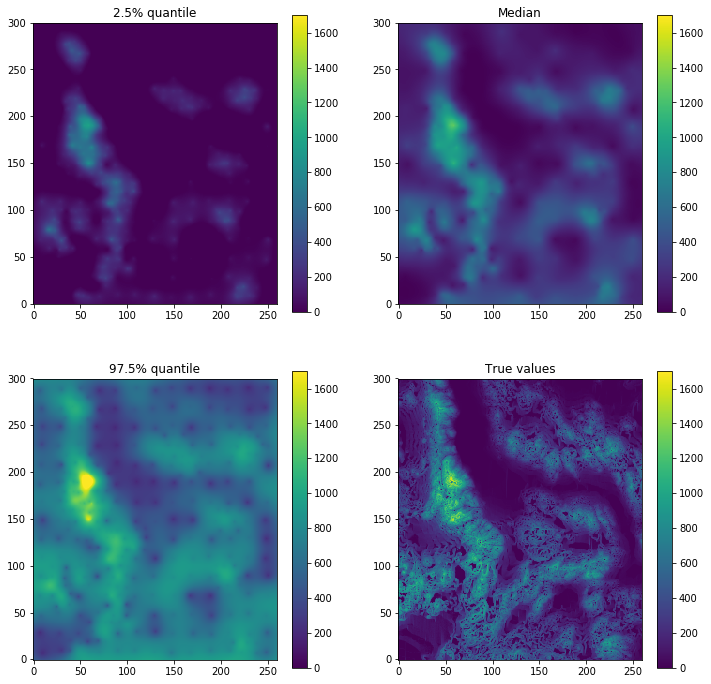

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.imshow(walker_ex.as_image("Vpred_p0.025"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("2.5% quantile")
plt.subplot(2, 2, 2)
plt.imshow(walker_ex.as_image("Vpred_p0.5"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("Median")
plt.subplot(2, 2, 3)
plt.imshow(walker_ex.as_image("Vpred_p0.975"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("97.5% quantile")
plt.subplot(2, 2, 4)
plt.imshow(walker_ex.as_image("V"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("True values")
plt.show()

## References

Rasmussen, C. E., & Williams, C. K. I. (2006). Gaussian processes for machine learning. Cambridge, Massachusetts: MIT Press. https://doi.org/10.1142/S0129065704001899

Snelson, E., Rasmussen, C. E., & Ghahramani, Z. (2004). Warped Gaussian processes. Adv Neural Inf Process Syst 16, 16, 337–344.

Isaaks, E. H., & Srivastava, R. M. (1989). Applied Geostatistics. New York, New York, USA: Oxford University.